## Predicting Boston Housing Prices

###  Import the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston_data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

### Find all keys for boston_data

In [3]:
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# all attributes under the key feature_names
boston_data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
# Description of the data
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
# returns the dimensions of data
boston_data.data.shape

(506, 13)

In [7]:
# returns the dimensions of target
boston_data.target.shape        # Target variable holds the price of the houses

(506,)

### Load the data into a DataFrame 

In [8]:
# Load boston_data into bos_df
bos_df = pd.DataFrame(boston_data.data)
bos_df.columns = [boston_data.feature_names]

# Return first 5 rows
bos_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Generate descriptive statistics

In [9]:
bos_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
# Assign x and y with data and target respectively
x = bos_df
y = pd.DataFrame(boston_data.target)

In [11]:
# Generate descriptive statistics for DataFrame x
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
# Generate descriptive statistics for DataFrame y
y.describe()

,0
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


### Import scikit-learn libraries

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Initialize the linear regression model
l_reg = linear_model.LinearRegression()

In [14]:
# Split data into 65% training data and 35% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=57)

In [15]:
l_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Print the coefficients
l_reg.coef_

array([[-1.24149593e-01,  4.79951610e-02,  6.59940813e-02,
         2.49644620e+00, -2.29486767e+01,  3.57267380e+00,
        -2.36843660e-03, -1.61016477e+00,  3.13697796e-01,
        -1.03545867e-02, -1.05795450e+00,  5.30751202e-03,
        -5.77301362e-01]])

In [17]:
# Print the coefficients for each column of our data model
coeff_df = pd.DataFrame(l_reg.coef_.flatten() ,x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.124150
ZN,0.047995
INDUS,0.065994
CHAS,2.496446
NOX,-22.948677
RM,3.572674
AGE,-0.002368
DIS,-1.610165
RAD,0.313698
TAX,-0.010355


In [18]:
# Display the intercept
print(l_reg.intercept_)

[44.32583168]


### Predictions

In [19]:
# Print our price predictions 
predictions = l_reg.predict(x_test)
print(predictions)

[[24.15629426]
 [23.59851573]
 [17.12720781]
 [20.50850549]
 [20.52331303]
 [18.99219235]
 [-4.44257289]
 [24.77520244]
 [18.47936401]
 [32.83385802]
 [18.9622772 ]
 [20.84959253]
 [23.1354102 ]
 [28.78786553]
 [34.3070975 ]
 [19.1457706 ]
 [23.18153398]
 [24.44848915]
 [20.07755157]
 [22.63350915]
 [20.01793027]
 [26.7612501 ]
 [31.68521752]
 [24.61147507]
 [18.37299393]
 [22.62967524]
 [17.95159692]
 [28.48242501]
 [35.3633903 ]
 [14.16602879]
 [36.14712648]
 [17.36447996]
 [20.09434386]
 [23.59954164]
 [19.2382437 ]
 [27.42764864]
 [14.08541782]
 [31.08531283]
 [32.24682306]
 [15.80313283]
 [13.50544805]
 [15.21359758]
 [27.95283129]
 [24.23250405]
 [ 3.13054116]
 [33.49300978]
 [25.88836093]
 [25.17838404]
 [22.90119705]
 [10.52222972]
 [27.49985203]
 [30.77665826]
 [21.95508277]
 [26.71864305]
 [31.9045358 ]
 [28.34300553]
 [27.84331035]
 [15.93865026]
 [35.25717557]
 [19.1640914 ]
 [31.80734413]
 [14.56746529]
 [22.56081531]
 [12.88395899]
 [43.69093594]
 [28.29608224]
 [27.49521

In [20]:
# print the prediction for the second row of y_test data actual price = 20.3
predictions[1]

array([23.59851573])

In [21]:
# print the actual price of houses from the y_test data 
y_test[0]

318    23.1
309    20.3
449    13.0
464    21.4
494    24.5
       ... 
240    22.0
51     20.5
135    18.1
424    11.7
186    50.0
Name: 0, Length: 178, dtype: float64

Text(0.5, 1.0, 'Prices vs Predicted prices')

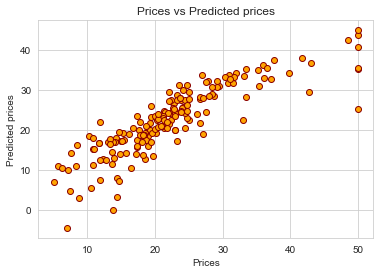

In [22]:
# Now plot Prices vs Predicted prices graph
plt.scatter(y_test, predictions, edgecolor='Darkred', color='orange')
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices')

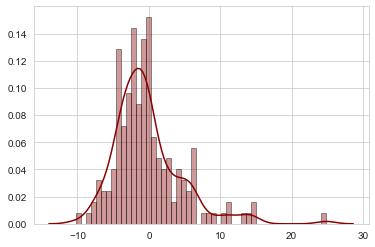

In [23]:
sns.distplot((y_test - predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Darkred')

### Now let's check model accuracy 

In [24]:
# mean squared error tells us how close a regression line is to a set of points.
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predictions))

23.026198484642887


In [25]:
l_reg.score(x_test,y_test)

0.7368039496310854

#### We got an accuracy of 73.68%

### Using Gradient Boosting Regressor (for weak prediction models)

In [26]:
# import ensemble
from sklearn import ensemble

In [27]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=3, min_samples_split=3, learning_rate=0.3, loss='ls')

In [28]:
gbr.fit(x_train,np.ravel(y_train,order='C'))

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.3, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# now let's predict
new_predictions = gbr.predict(x_test)

Text(0.5, 1.0, 'Prices vs Predicted prices')

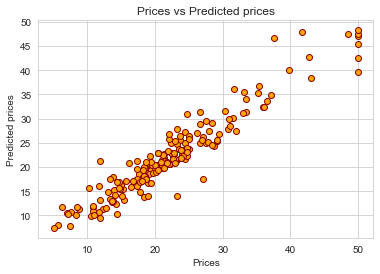

In [30]:
# once again plot Prices vs Predicted prices graph
plt.scatter(y_test, new_predictions, edgecolor='Darkred', color='orange')
plt.xlabel('Prices')
plt.ylabel('Predicted prices')
plt.title('Prices vs Predicted prices')

In [31]:
# print the new prediction for the second row of our test data actual price = 20.3
new_predictions[1]

19.736771278364593

Here we can observe that the original prediction was 23.59851573 and new prediction is 19.73677127 for the actual price = 20.3

In [32]:
gbr.score(x_test,y_test)

0.9076031608342869

#### We got an accuracy of 90.76% !!

                                  -----------------------------